In [1]:
# L1/L2 실습 당뇨병 예측 모델
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes


In [2]:
#당뇨병환자 데이터 셋
diabete=load_diabetes()
df=pd.DataFrame(diabete.data, columns=diabete.feature_names)
df['degree']=diabete.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,degree
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
input=diabete.data
output=df['degree']

In [4]:
#데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output=train_test_split(input,output)

In [5]:
# 릿지 라쏘 학습
from sklearn.linear_model import Ridge, Lasso
RG=Ridge(alpha=0.1)
RG.fit(train_input,train_output)
LS=Lasso(alpha=0.1)
LS.fit(train_input,train_output)

Lasso(alpha=0.1)

In [6]:
# 릿지 회귀 상관관계 확인
np.corrcoef(RG.predict(test_input),test_output)

array([[1.        , 0.72682902],
       [0.72682902, 1.        ]])

In [7]:
# 라쏘 회귀 상관관계 확인
np.corrcoef(LS.predict(test_input),test_output)

array([[1.        , 0.72961717],
       [0.72961717, 1.        ]])

In [8]:
# 라쏘 회귀 상관관계 확인

RG.n_features_in_,LS.n_features_in_

(10, 10)

In [9]:
# Feature 수 확인

diabete.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
# 릿지 실제 feature 의 가중치 확인 [릿지/ 라쏘 차이 확인 필수 ★]
RG.coef_

array([ -52.40657564, -230.75129956,  471.20768113,  297.29403366,
        -48.80962914,  -70.30775218, -209.34066138,  140.01841122,
        389.79555755,   84.71750889])

In [11]:
# 라쏘 실제 feature 의 가중치 확인 [릿지/ 라쏘 차이 확인 필수 ★]
LS.coef_

array([ -14.42296584, -201.66082433,  506.2967644 ,  268.69987399,
         -0.        ,  -10.61903508, -270.00428784,    0.        ,
        421.88482738,   24.4025335 ])

In [12]:
#alpha 값 증가

In [13]:
RG2=Ridge(alpha=1)
RG2.fit(train_input,train_output)
LS2=Lasso(alpha=1)
LS2.fit(train_input,train_output)

Lasso(alpha=1)

In [14]:
np.corrcoef(RG2.predict(test_input),test_output)

array([[1.        , 0.71930387],
       [0.71930387, 1.        ]])

In [15]:
np.corrcoef(LS2.predict(test_input),test_output)

array([[1.        , 0.70843262],
       [0.70843262, 1.        ]])

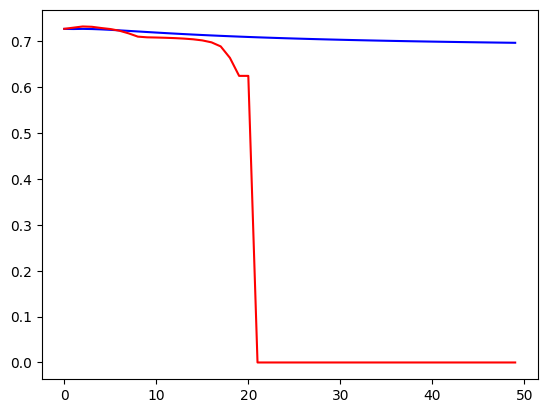

In [16]:
# 알파값(학습률; 람다)의 조절에 따른 상관관계 확인하고 L1/L2 규제를 쓰기
RG_corr=[]
LS_corr=[]
i_num=0
for i in np.arange(0.01,5.0,0.1):
  RG=Ridge(alpha=i)
  RG.fit(train_input,train_output)
  LS=Lasso(alpha=i)
  LS.fit(train_input, train_output)
  RG_corr.append(np.corrcoef(RG.predict(test_input),test_output)[0][1])
  LS_corr.append(np.corrcoef(LS.predict(test_input),test_output)[0][1])
  i_num+=1

plt.plot(range(i_num),RG_corr,'b')
plt.plot(range(i_num),LS_corr,'r')